<div>
    <center>
    <h1> Projectile Motion </h1>
    <br>
    by <a href="http://github.com/ComputoCienciasUniandes"> ComputoCienciasUniandes</a> 
    <br> <a href="http://github.com/jsbarbosa" > Juan Barbosa </a>
    </center>
</div>
<hr style="height:5px">

# Librerías

In [1]:
import numpy as np
from numpy import sin, cos

from scipy.constants import g
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Sistema

La fuerza de fricción debido a un fluido viscoso es modelada empíricamente como dependiente de la velocidad.
$$ f = \beta v $$

Debido a su naturaleza esta siempre actua en la dirección contraria al movimiento:
$$ \vec{F} = m\vec{a} = -\vec{f} + m\vec{g} \qquad \vec{g} = (0, -g)$$

Para la dirección $x$ se tiene la siguiente ecuación diferencial que se puede resolver usando el polinomio característico.
$$
\begin{array}{c}
\ddot{x} = -\frac{\beta}{m}\dot{x} = -b\dot{x} \\
r^2 = -br
\end{array}
$$

Las soluciones al polinomio son $r = 0$ y $r = -b$.
$$ 
\begin{array}{c}
x(t) = Ae^{0t} + Be^{-bt} = A + Be^{-bt} \\
\dot{x}(t) = -bBe^{-bt} 
\end{array}
$$

Con las condiciones iniciales se obtiene: $B = -v_0/b$ y $A = x_0 + v_0/b$.
$$ x(t) = \left(x_0 + \frac{v_0}{b}\right) - \frac{v_0}{b}e^{-bt} = \frac{x_0b + v_0\left(1-e^{-bt}\right)}{b}$$

Para $y$ se realiza algo similar y se obtiene:
$$ y(t) = \frac{g \left(-bt - e^{-bt} + 1\right) + b\left(by_0 + v_0\left( 1 - e^{-b t}\right)\right)}{b^2} $$

In [2]:
def regular(r_0, v, th, t):
    v_0 = [v*cos(th), v*sin(th)]
    x = r_0[0] + v_0[0]*t
    y = r_0[1] + v_0[1]*t -0.5*g*t**2
    return x, y

def first_order(r_0, v, th, t):
    exp = np.exp(-b*t)
    v_0 = [v*cos(th), v*sin(th)]
    x = (r_0[0]*b + v_0[0]*(1 - exp))/b
    y = (g*(-b*t-exp+1) + b*(b*r_0[1] - v_0[1]*(exp - 1)))/(b**2)
    return x, y

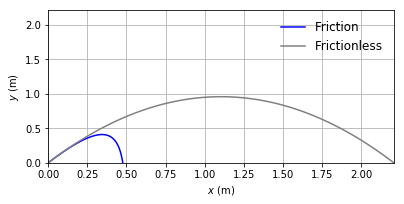

In [11]:
fig, ax1 = plt.subplots()
ax1.grid()

fig.subplots_adjust(left=0.1, bottom=0.35)

colors = ["blue", "grey"]
labels = ["Friction", "Frictionless"]
static = [ax1.plot([], [], '-', c = colors[i], label = labels[i])[0] for i in range(2)]
dynamic = [ax1.plot([], [], 'o', c = colors[i])[0] for i in range(2)]

ax1.legend(fontsize=12).get_frame().set_alpha(0.0) # legenda en la gráfica
ax1.set_xlabel("$x$ (m)")
ax1.set_ylabel("$y$ (m)")


N = 100

def init(b_init=5.0, angle_init=60.0, speed_init=5.0):
    global xs, ys, b
    
    b, th, v = b_init, angle_init, speed_init
    r_0 = np.zeros(2)
    th = np.deg2rad(th)
    
    t_max = 2*v*sin(th)/g
    t = np.linspace(0, t_max, N)
    
    x_f, y_f = first_order(r_0, v, th, t)
    x_n, y_n = regular(r_0, v, th, t)
    
    max_x = max(x_n)
    max_y = max(y_n)
    if max_x < max_y:
        max_x = max_y
    
    ax1.set_xlim(0, max_x)
    ax1.set_ylim(0, max_x)
    
    xs = [x_f, x_n]
    ys = [y_f, y_n]
    
    for i in range(2):
        static[i].set_data(xs[i], ys[i])
        
    return xs, ys


def update(i):
    for j in range(2):
        dynamic[j].set_data(xs[j][i], ys[j][i])
    return tuple(dynamic)

ani = animation.FuncAnimation(fig, update, N, interval = N/5, init_func=init)

#ani.save("ProjectileMotion.gif", writer = "imagemagick", fps = N/5)
plt.show()